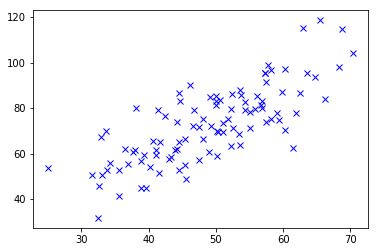

In [21]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("../l1_data.csv", delimiter=",")
plt.plot(data[:, 0], data[:, 1], 'bx')
plt.show()

In [137]:
def split(data):
    examples_count, columns_count = data.shape
    return data[:, 0:columns_count - 1], data[:, columns_count - 1]

def add_bias(data):
    examples_count, columns_count = data.shape
    bias = np.ones((examples_count, columns_count + 1))
    bias[:, 1:] = data
    return bias

def hypothesis(thetas, features):
    return np.dot(thetas, features.T)

def train(data, learning_rate=0.001, iterations=100):
    features, y = split(data)
    bias_features = add_bias(features)
    examples_count, features_count = bias_features.shape
    costs = np.zeros((1, iterations))
    thetas = np.zeros((1, features_count))
    for i in range(iterations):
        costs[0, i] = (1 / (2 * examples_count)) * np.sum((hypothesis(thetas, bias_features) - y) ** 2, axis=1)
        thetas = thetas - (learning_rate / examples_count) * np.dot(hypothesis(thetas, bias_features) - y, bias_features)
    return thetas, costs

In [142]:
thetas, costs = train(data)

In [147]:
def plot_data(data, predicted, costs):
    x, y = data
    fig, (g1, g2) = plt.subplots(nrows=2, ncols=1)
    g1.plot(x, y, 'bo', markersize=2)
    g1.plot(x, predicted, 'ro', markersize=2)
    g1.axis([x.min() - x.mean() / 10, x.max() + x.mean()/ 10, y.min() - y.mean()/ 10, y.max() + y.mean()/ 10])
    g2.plot(costs)
    plt.show()

    
def predict(theta, x):
    m, features = x.shape
    x_bias = np.column_stack((np.ones(m), x))
    y = np.sum(np.transpose(theta) * x_bias, axis=1)
    return y

def plot(costs):
    plt.plot(costs)
    plt.show()

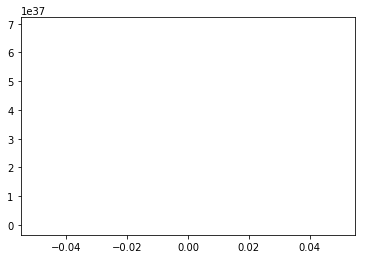

[[  2.78255392e+03   6.12446183e+03   1.35629995e+04   3.01199614e+04
    6.69730364e+04   1.49001922e+05   3.31584735e+05   7.37984056e+05
    1.64256213e+06   3.65600418e+06   8.13759515e+06   1.81128798e+07
    4.03162233e+07   8.97372153e+07   1.99740218e+08   4.44588815e+08
    9.89581534e+08   2.20264572e+09   4.90272715e+09   1.09126645e+10
    2.42897968e+10   5.40650939e+10   1.20340010e+11   2.67857075e+11
    5.96205809e+11   1.32705610e+12   2.95380869e+12   6.57469249e+12
    1.46341845e+13   3.25732886e+13   7.25027847e+13   1.61379278e+14
    3.59203739e+14   7.99528463e+14   1.77961890e+15   3.96113907e+15
    8.81684429e+15   1.96248457e+16   4.36816800e+16   9.72282375e+16
    2.16414071e+17   4.81702139e+17   1.07218976e+18   2.38651812e+18
    5.31199695e+18   1.18236318e+19   2.63174604e+19   5.85783398e+19
    1.30385753e+20   2.90217248e+20   6.45975878e+20   1.43783609e+21
    3.20038674e+21   7.12353468e+21   1.58558169e+22   3.52924415e+22
    7.85551722e+22  

In [149]:
plot(costs)
print(costs)